<a href="https://colab.research.google.com/github/imnirmilshah/INSIGHT-CODING-CHALLENGE/blob/Artificial_Intelligence/ANN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation and setup

# New Section

In [2]:
pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 3.8MB 52.5MB/s 
     |████████████████████████████████| 450kB 47.0MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [0]:
import tensorflow as tf

In [2]:
#checking the version
print(tf.__version__)

2.0.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Data Preprocessing

In [0]:

from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [8]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [9]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
np.max(x_train)

255

In [11]:
np.min(x_train)

0

In [12]:
np.mean(x_train)

72.94035223214286

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
np.max(y_train),np.min(y_train)

(9, 0)

In [0]:

class_names=['0 Top/T-shirt','1 Trouser','2 Pullover','3 Dress','4 Coat','5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle Boot']

In [16]:
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


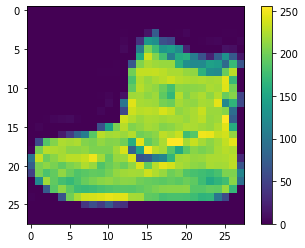

In [17]:
#Data Exploration
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [18]:
y_train[0]

9

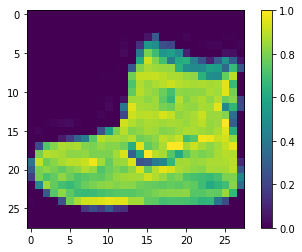

In [19]:
#Normalization the dataset
x_train=x_train/255.0
x_test=x_test/255.0
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [20]:
#Flattening the dataset 
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [22]:
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

# building the model

In [0]:
#Define an object
model=tf.keras.models.Sequential()
#Sequence of layers



In [0]:
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [0]:
#so that it cannot be overfitted
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
 model.add(tf.keras.layers.Dense(units=10, activation="sigmoid"))

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train,y_train,epochs=20)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.5980 - sparse_categorical_accuracy: 0.7897
Epoch 2/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4301 - sparse_categorical_accuracy: 0.8444
Epoch 3/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3968 - sparse_categorical_accuracy: 0.8561
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3751 - sparse_categorical_accuracy: 0.8631
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3595 - sparse_categorical_accuracy: 0.8684
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3446 - sparse_categorical_accuracy: 0.8738
Epoch 7/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3343 - sparse_categorical_accuracy: 0.8765
Epoch 8/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3259 - sp

In [30]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [31]:
print("Test Accuracy{}".format(test_accuracy))

Test Accuracy0.8837000131607056


In [0]:
y_pred=model.predict_classes(x_test)

In [33]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [34]:
y_pred[6]

4

In [35]:
y_test[6]

4

In [36]:
#confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(y_test,y_pred)
print(cm)

[[835   0   9  29   3   0 120   0   4   0]
 [  1 966   0  23   4   0   6   0   0   0]
 [ 15   0 754  15 126   0  89   0   1   0]
 [ 16   4  11 898  36   0  31   0   4   0]
 [  0   0  68  30 850   0  51   0   1   0]
 [  0   0   0   0   0 955   0  26   1  18]
 [113   0  75  41  76   0 688   0   7   0]
 [  0   0   0   0   0   9   0 954   0  37]
 [  1   0   2   5   4   2  14   3 969   0]
 [  0   0   0   0   0   6   1  25   0 968]]


In [37]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.8837
